Enter the path to the CSV file: /content/tvmarketing.csv
Estimated coefficients:
b_0 = 7.0325935491276965 
b_1 = 0.047536640433019736


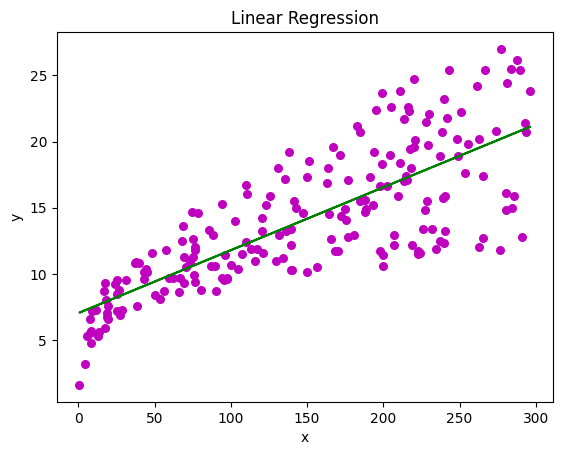

In [ ]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum((x - m_x) * (y - m_y))
    SS_xx = np.sum((x - m_x) ** 2)
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color="m", marker="o", s=30)
    y_pred = b[0] + b[1] * x
    plt.plot(x, y_pred, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Linear Regression")
    plt.show()

# Load dataset
file_path = input("Enter the path to the CSV file: ")
df = pd.read_csv(file_path)

# Assuming the dataset has two numerical columns: 'x' and 'y'
x = df.iloc[:, 0].values  # First column as x
y = df.iloc[:, 1].values  # Second column as y

b = estimate_coef(x, y)
print(f"Estimated coefficients:\nb_0 = {b[0]} \nb_1 = {b[1]}")
plot_regression_line(x, y, b)

Accuracy: 0.97


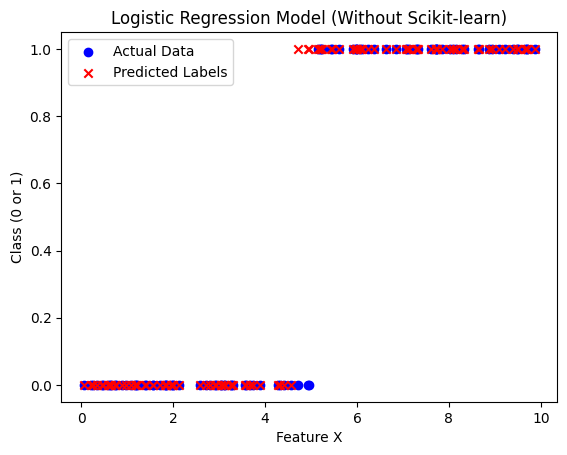

In [ ]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Generate synthetic binary classification data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = (X > 5).astype(int).ravel()  # Label: 1 if X > 5, else 0

# Add intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
theta = np.zeros(X_b.shape[1])
alpha = 0.1
iterations = 1000

# Train logistic regression using gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Make predictions
y_pred = predict(X_b, theta)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_pred, color='red', marker='x', label='Predicted Labels')
plt.xlabel("Feature X")
plt.ylabel("Class (0 or 1)")
plt.legend()
plt.title("Logistic Regression Model (Without Scikit-learn)")
plt.show()

Model Coefficients: [0.04026032 3.31385993 0.12078097]
Intercept: -3.1599509492879228
Mean Squared Error: 5.362912814290877
R-squared Score: 0.9935326149415827


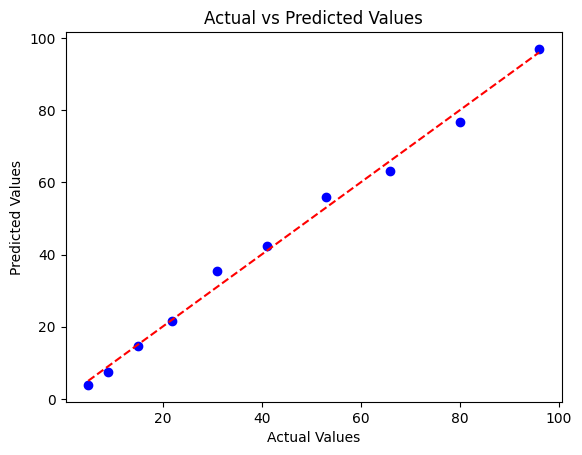

In [ ]:
#Multiple Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "Feature1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature2": [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    "Feature3": [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
    "Target": [5, 9, 15, 22, 31, 41, 53, 66, 80, 96]
}

df = pd.DataFrame(data)

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Target"]).values
y = df["Target"].values.reshape(-1, 1)

# Add intercept column (bias term)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Compute the coefficients using the Normal Equation
beta = np.linalg.solve(X.T @ X + 0.01 * np.identity(X.shape[1]), X.T @ y)

# Make predictions
y_pred = X @ beta

# Evaluate the model
mse = np.mean((y - y_pred) ** 2)
total_variance = np.sum((y - np.mean(y)) ** 2)
explained_variance = np.sum((y_pred - np.mean(y)) ** 2)
r2 = explained_variance / total_variance

# Display results
print("Model Coefficients:", beta[1:].flatten())
print("Intercept:", beta[0][0])
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot actual vs predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()